In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [4]:
df1 = pd.read_csv('population.csv',low_memory=False)
df1.head()

,ladcode20,laname20,country,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,...,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020,Unnamed: 25
0,E06000001,Hartlepool,E,1,0,525,502,516,553,531,...,595,576,551,497,576,507,535,515,517,NaN
1,E06000001,Hartlepool,E,1,1,544,526,498,526,550,...,615,601,567,553,512,570,515,532,519,NaN
2,E06000001,Hartlepool,E,1,2,548,548,551,507,521,...,586,621,600,576,562,534,576,515,528,NaN
3,E06000001,Hartlepool,E,1,3,556,546,548,553,508,...,578,584,625,598,579,565,530,583,520,NaN
4,E06000001,Hartlepool,E,1,4,606,549,553,540,554,...,616,593,568,620,604,591,576,533,580,NaN


In [5]:
df1.shape

(68978, 26)

In [7]:
df1 = df1[df1.loc[:,'country']=='E']

In [16]:
df2 = df1.groupby(['ladcode20','laname20']).sum()
df2.head()

,,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,population_2006,population_2007,population_2008,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
ladcode20,laname20,,,,,,,,,,,,,,,,,,,,,
E06000001,Hartlepool,273,8190,90152,89993,90134,90317,90457,90781,90969,91379,...,92088,92261,92662,92606,92498,92845,93019,93242,93663,93836
E06000002,Middlesbrough,273,8190,141233,140090,139050,138451,138517,138169,138190,137885,...,138368,138726,138911,138991,139310,140326,140639,140545,140980,141285
E06000003,Redcar and Cleveland,273,8190,139159,138520,138565,138643,138177,137621,136940,136512,...,135164,134976,134960,135102,135324,135496,136005,136718,137150,137228
E06000004,Stockton-on-Tees,273,8190,183795,184940,185699,185687,186350,187270,187937,189039,...,191824,192487,193433,194423,195128,195958,196487,197213,197348,197419
E06000005,Darlington,273,8190,97894,98474,98911,99343,100287,101509,102632,103694,...,105584,105503,105726,105877,105998,106327,106347,106566,106803,107402


In [18]:
df2.drop(columns=['sex','age'],inplace=True)

In [31]:
df3 = df2.loc[:,'ladcode20':'laname20']

In [33]:
columns = []
years = list(range(2001,2021))
for x in range(2001,2021):
    columns.append(f'population_{x}')
for x in range(len(years)):
    df3[years[x]] = df2[columns[x]]

df3.head()

,,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
ladcode20,laname20,,,,,,,,,,,,,,,,,,,,
E06000001,Hartlepool,90152,89993,90134,90317,90457,90781,90969,91379,91530,91773,92088,92261,92662,92606,92498,92845,93019,93242,93663,93836
E06000002,Middlesbrough,141233,140090,139050,138451,138517,138169,138190,137885,137273,137667,138368,138726,138911,138991,139310,140326,140639,140545,140980,141285
E06000003,Redcar and Cleveland,139159,138520,138565,138643,138177,137621,136940,136512,135867,135383,135164,134976,134960,135102,135324,135496,136005,136718,137150,137228
E06000004,Stockton-on-Tees,183795,184940,185699,185687,186350,187270,187937,189039,189978,190902,191824,192487,193433,194423,195128,195958,196487,197213,197348,197419
E06000005,Darlington,97894,98474,98911,99343,100287,101509,102632,103694,104355,105028,105584,105503,105726,105877,105998,106327,106347,106566,106803,107402


In [38]:
df3.reset_index(inplace=True)

In [41]:
df3.rename({'ladcode20':'LA_code','laname20':'LA'},axis='columns',inplace=True)

In [43]:
df3 = pd.melt(df3,id_vars=['LA_code','LA'],var_name='year',value_name='population')

In [46]:
years = pd.to_datetime(df3.year,format='%Y')
df3['date'] = years
df3.head()

,LA_code,LA,year,population,date
0,E06000001,Hartlepool,2001,90152,2001-01-01
1,E06000002,Middlesbrough,2001,141233,2001-01-01
2,E06000003,Redcar and Cleveland,2001,139159,2001-01-01
3,E06000004,Stockton-on-Tees,2001,183795,2001-01-01
4,E06000005,Darlington,2001,97894,2001-01-01


In [47]:
df_cov = df3[df3.loc[:,'LA']=='Coventry']

In [48]:
x = df_cov['date']
y = df_cov['population']

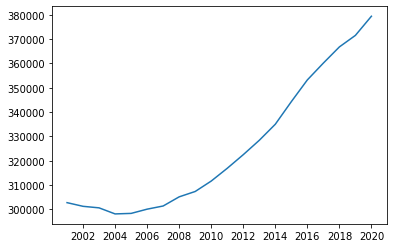

In [49]:
plt.plot(x,y)

In [50]:
df3.to_excel('Population by LA, 2001-2020.xlsx')